In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## data

In [2]:
file1 = pd.read_csv('data/inflasi fred.csv')
file1 = file1.drop(file1.index[0:31], axis=0)
file1 = file1.rename(columns={'FPCPITOTLZGIDN': 'INFLASI'})
print(file1.shape)
file1.head()

(33, 2)


,DATE,INFLASI
31,1991-01-01,9.419058
32,1992-01-01,7.523517
33,1993-01-01,9.671893
34,1994-01-01,8.532005
35,1995-01-01,9.420323


In [3]:
file2 = pd.read_csv('data/penganguran fred.csv')
file2 = file2.rename(columns={'SLUEM1524ZSIDN': 'PENGANGGURAN'})
print(file2.shape)
file2.head()

(33, 2)


,DATE,PENGANGGURAN
0,1991-01-01,7.866
1,1992-01-01,8.242
2,1993-01-01,8.565
3,1994-01-01,13.108
4,1995-01-01,14.013


In [4]:
file3 = pd.read_csv('data/sukubunga fred.csv')
file3 = file3.iloc[1:, :] 
file3 = file3.rename(columns={'IRSTCB01IDM156N': 'SUKU BUNGA'})
print(file3.shape)
file3.head()

(33, 2)


,DATE,SUKU BUNGA
1,1991-01-01,19.312500
2,1992-01-01,15.987500
3,1993-01-01,10.617500
4,1994-01-01,10.294167
5,1995-01-01,14.111667


In [5]:
file4 = pd.read_csv('data/kurs fred.csv')
file4 = file4.drop(file4.index[0:1], axis=0)
file4 = file4.rename(columns={'CCRETT01IDM661N': 'NILAI TUKAR'})
print(file4.shape)
file4.head()

(33, 2)


,DATE,NILAI TUKAR
1,1991-01-01,120.911342
2,1992-01-01,117.321483
3,1993-01-01,121.661275
4,1994-01-01,120.982708
5,1995-01-01,117.086225


In [6]:
file5 = pd.read_csv('data/gdp fred.csv')
file5 = file5.drop(file5.index[0:31], axis=0)
file5 = file5.rename(columns={'NYGDPPCAPKDIDN': 'GDP'})
print(file5.shape)
file5.head()

(33, 2)


,DATE,GDP
31,1991-01-01,1556.806664
32,1992-01-01,1629.847978
33,1993-01-01,1706.952365
34,1994-01-01,1805.603885
35,1995-01-01,1922.352118


In [7]:
file6 = pd.read_csv('data/konsumsi fred.csv')
file6 = file6.drop(file6.index[0:2], axis=0)
file6 = file6.rename(columns={'PLCCPPIDA670NRUG': 'KONSUMSI RT'})

mean_value = file6['KONSUMSI RT'].mean()
new_rows = pd.DataFrame({
    'DATE': ['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01'],
    'KONSUMSI RT': [mean_value] * 4
})
file6u = pd.concat([file6, new_rows], ignore_index=True)
print(file6u.shape)
file6u.head()

(33, 2)


,DATE,KONSUMSI RT
0,1991-01-01,0.217840
1,1992-01-01,0.223746
2,1993-01-01,0.241392
3,1994-01-01,0.259007
4,1995-01-01,0.272217


In [8]:
file7 = pd.read_csv('data/money fred.csv')
file7 = file7.drop(file7.index[0:1], axis=0)
file7 = file7.rename(columns={'MABMM301IDA189S_NBD19900101': 'UANG BEREDAR'})
mean_value = file7['UANG BEREDAR'].mean()
new_rows = pd.DataFrame({
    'DATE': ['2023-01-01'],
    'UANG BEREDAR': [mean_value] * 1
})
file7u = pd.concat([file7, new_rows], ignore_index=True)
print(file7u.shape)
file7u.head()

(33, 2)


,DATE,UANG BEREDAR
0,1991-01-01,125.71635
1,1992-01-01,152.27847
2,1993-01-01,181.95688
3,1994-01-01,220.98952
4,1995-01-01,275.78751


In [9]:
file8 = pd.read_csv('data/commudity fred.csv')
file8 = file8.drop(file8.index[0:1], axis=0)
file8 = file8.drop(file8.index[-1], axis=0)
file8 = file8.rename(columns={'XTEXVA01IDM664S_NBD19900101': 'KOMODITAS'})
file8['KOMODITAS'] = pd.to_numeric(file8['KOMODITAS'], errors='coerce')
print(file8.shape)
file8.head()

(33, 2)


,DATE,KOMODITAS
1,1991-01-01,120.40732
2,1992-01-01,145.69782
3,1993-01-01,162.83676
4,1994-01-01,183.17008
5,1995-01-01,216.36225


## processing

In [10]:
df = (file1
               .merge(file2, on=['DATE'])
               .merge(file3, on=['DATE'])
               .merge(file4, on=['DATE'])
               .merge(file5, on=['DATE'])
               .merge(file6u, on=['DATE'])
               .merge(file7u, on=['DATE'])
               .merge(file8, on=['DATE']))
df.head(10)

,DATE,INFLASI,PENGANGGURAN,SUKU BUNGA,NILAI TUKAR,GDP,KONSUMSI RT,UANG BEREDAR,KOMODITAS
0,1991-01-01,9.419058,7.866,19.312500,120.911342,1556.806664,0.217840,125.71635,120.40732
1,1992-01-01,7.523517,8.242,15.987500,117.321483,1629.847978,0.223746,152.27847,145.69782
2,1993-01-01,9.671893,8.565,10.617500,121.661275,1706.952365,0.241392,181.95688,162.83676
3,1994-01-01,8.532005,13.108,10.294167,120.982708,1805.603885,0.259007,220.98952,183.17008
4,1995-01-01,9.420323,14.013,14.111667,117.086225,1922.352118,0.272217,275.78751,216.36225
5,1996-01-01,7.973281,14.951,13.819167,125.827775,2039.362989,0.284147,353.57927,246.89667
6,1997-01-01,6.226142,14.958,14.497500,119.338047,2101.254149,0.249438,444.80514,329.78977
7,1998-01-01,58.451044,16.757,49.324167,57.422148,1797.083922,0.130382,721.26562,1047.66752
8,1999-01-01,20.477831,19.296,23.142500,84.404350,1784.333595,0.208632,878.11757,803.19346
9,2000-01-01,3.688619,19.177,12.546667,82.134293,1845.227801,0.192449,964.96506,1111.08672


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          33 non-null     object 
 1   INFLASI       33 non-null     float64
 2   PENGANGGURAN  33 non-null     float64
 3   SUKU BUNGA    33 non-null     float64
 4   NILAI TUKAR   33 non-null     float64
 5   GDP           33 non-null     float64
 6   KONSUMSI RT   33 non-null     float64
 7   UANG BEREDAR  33 non-null     float64
 8   KOMODITAS     33 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.4+ KB


<Axes: >

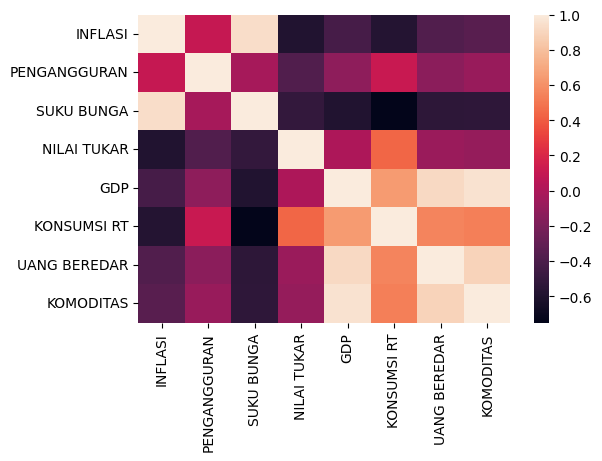

In [12]:
df1 =df.iloc[:, 1:] 
corr_matrix = df1.corr()
corr_matrix
fig = plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix)

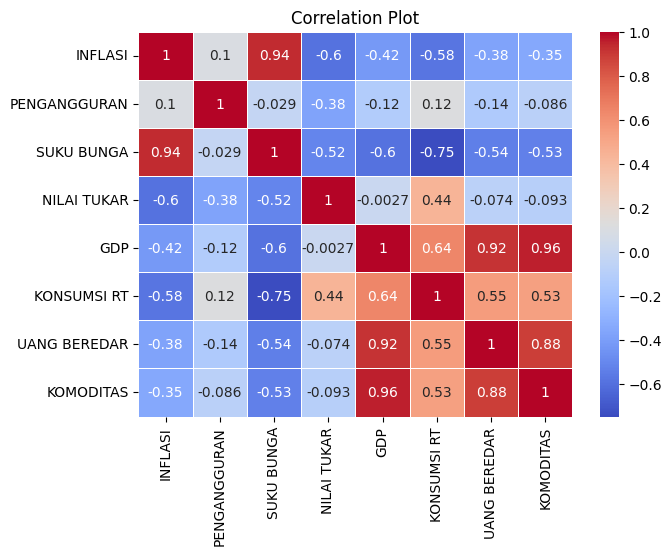

In [13]:
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [14]:
import scipy.stats as stats

In [15]:
# X = df[['PENGANGGURAN',	'SUKU BUNGA',	'NILAI TUKAR', 'GDP','KONSUMSI RT',	'UANG BEREDAR',	'KOMODITAS']]
# X = sm.add_constant(X)  

# vif_data = pd.DataFrame()
# vif_data["variable"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_data)

In [16]:
x = df[['PENGANGGURAN',	'SUKU BUNGA',	'NILAI TUKAR',  'GDP','KONSUMSI RT',	'UANG BEREDAR',	'KOMODITAS']]
y = df['INFLASI']

# x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                INFLASI   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              104.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    2.03e-17
Time:                        21:24:35   Log-Likelihood:                         -75.348
No. Observations:                  33   AIC:                                      164.7
Df Residuals:                      26   BIC:                                      175.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PENGANGGURAN     0.0407      0.110      0.371      0.714      -0.185       0.266
SUKU BUNGA       1.2394      0.074     16.762      0.000       1.087       1.391
NILAI TUKAR     -0.1065      0.036     -2.948      0.007      -0.181      -0.032
GDP             -0.0044      0.003     -1.749      0.092      -0.010       0.001
KONSUMSI RT     42.6934     14.289      2.988      0.006      13.323      72.064
UANG BEREDAR     0.0002      0.000      0.467      0.644      -0.001       0.001
KOMODITAS        0.0014      0.001      1.952      0.062   -7.52e-05       0.003
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.002
Skew:                           0.218   Prob(JB):                        0.606
Kurtosis:                       3.734   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y_pred = model.predict(x) 
error = y-y_pred 
gab= pd.DataFrame({'Actual': y, 'Predicted': y_pred, 'Error':error}) 
gab.head(10)

,Actual,Predicted,Error
0,9.419058,14.009559,-4.590501
1,7.523517,10.256815,-2.733298
2,9.671893,3.595248,6.076645
3,8.532005,3.804503,4.727503
4,9.420323,9.093761,0.326563
5,7.973281,7.889303,0.083977
6,6.226142,7.800879,-1.574738
7,58.451044,54.961415,3.489630
8,20.477831,22.819248,-2.341417
9,3.688619,9.418032,-5.729413


In [18]:
meanAbErr = metrics.mean_absolute_error(y, y_pred) 
meanSqErr = metrics.mean_squared_error(y, y_pred) 
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred)) 
print('Mean Absolute Error:', meanAbErr) 
print('Mean Square Error:', meanSqErr) 
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.7039429970069424
Mean Square Error: 5.633000561601651
Root Mean Square Error: 2.373394312288131


In [19]:
vif_data = pd.DataFrame() 
vif_data["Fitur"] = x.columns 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                   for i in range(len(x.columns))] 
vif_data

,Fitur,VIF
0,PENGANGGURAN,16.692923
1,SUKU BUNGA,4.679630
2,NILAI TUKAR,66.816592
3,GDP,222.735908
4,KONSUMSI RT,85.576432
5,UANG BEREDAR,14.741588
6,KOMODITAS,33.445765


### SOLUSI 1

In [20]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale

In [21]:
pca = PCA() 
xr=pca.fit_transform(scale(x))

In [22]:
xr = pd.DataFrame (xr) 
vif_data_r = pd.DataFrame() 
vif_data_r["Fitur"] = x.columns 
vif_data_r["VIF"] = [variance_inflation_factor(xr.values, i) 
                     for i in range(len(xr.columns))] 
vif_data_r

,Fitur,VIF
0,PENGANGGURAN,1.0
1,SUKU BUNGA,1.0
2,NILAI TUKAR,1.0
3,GDP,1.0
4,KONSUMSI RT,1.0
5,UANG BEREDAR,1.0
6,KOMODITAS,1.0


In [23]:
xr = sm.add_constant(xr)
modelPCA= sm.OLS(y,xr).fit()
modelPCA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INFLASI   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     61.41
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           3.60e-14
Time:                        21:24:35   Log-Likelihood:                -73.590
No. Observations:                  33   AIC:                             163.2
Df Residuals:                      25   BIC:                             175.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5167      0.450     18.923      0.000       7.590       9.444
0              3.0802      0.230     13.387      0.000       2.606       3.554
1              3.9899      0.361     11.054      0.000       3.247       4.733
2             -1.6449      0.424     -3.875      0.001      -2.519      -0.771
3              8.9831      0.905      9.926      0.000       7.119      10.847
4              2.7442      1.248      2.200      0.037       0.175       5.314
5              4.3544      1.489      2.925      0.007       1.288       7.421
6              3.4216      2.775      1.233      0.229      -2.294       9.137
==============================================================================
Omnibus:                        9.161   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.362
Skew:                           0.885   Prob(JB):                       0.0153
Kurtosis:                       4.717   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
xr1 = xr
xr1.pop(4)
xr1.head()

,const,0,1,2,3,5,6
0,1.0,2.257129,-1.748954,-1.979143,0.080568,0.164002,0.172679
1,1.0,2.040225,-1.648138,-1.774174,-0.142913,-0.126663,0.129850
2,1.0,1.580126,-2.110406,-1.457762,-0.398394,-0.248280,0.089209
3,1.0,1.446312,-1.798494,-0.466476,-0.303935,0.008782,-0.025053
4,1.0,1.511378,-1.386923,-0.359407,0.150509,0.036106,-0.098987


In [25]:
modelPCA2 = sm.OLS(y, xr1).fit()
modelPCA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INFLASI   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     61.72
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           3.86e-14
Time:                        21:24:35   Log-Likelihood:                -76.510
No. Observations:                  33   AIC:                             167.0
Df Residuals:                      26   BIC:                             177.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5167      0.482     17.664      0.000       7.526       9.508
0              3.0802      0.246     12.496      0.000       2.574       3.587
1              3.9899      0.387     10.318      0.000       3.195       4.785
2             -1.6449      0.455     -3.617      0.001      -2.580      -0.710
3              8.9831      0.970      9.265      0.000       6.990      10.976
5              4.3544      1.595      2.730      0.011       1.076       7.633
6              3.4216      2.973      1.151      0.260      -2.689       9.532
==============================================================================
Omnibus:                        4.685   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.260
Skew:                           0.723   Prob(JB):                        0.196
Kurtosis:                       3.531   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SOLUSI 2

In [26]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error  

In [27]:
alphas = 10**np.linspace(10,-2,100)*0.5 
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [29]:
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
# ridge = Ridge()
# coefs = []

# for a in alphas:
#     ridge.set_params(alpha=a)
#     ridge.fit(x_scaled, y)  
#     coefs.append(ridge.coef_)
# print(np.shape(coefs))

In [30]:
# ax = plt.gca() 
# ax.plot(alphas, coefs) 
# ax.set_xscale('log') 
# plt.axis('tight') 
# plt.xlabel('alpha') 
# plt.ylabel('weights')

In [31]:
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
# ridge1 = Ridge(alpha=4)
# ridge1.fit(x_scaled, y)
# pred_ridge1 = ridge1.predict(x_scaled)

# print(pd.Series(ridge1.coef_, index=x.columns))
# print(mean_squared_error(y, pred_ridge1))

In [32]:
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
# ridge2 = Ridge(alpha = 2) 
# ridge2.fit(x, y) 
# pred_ridge2 = ridge2.predict(x) 

# print(pd.Series(ridge2.coef_, index = x.columns)) 
# print(mean_squared_error(y, pred_ridge2))

In [33]:
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
# ridge3 = Ridge(alpha = 1) 
# ridge3.fit(x, y) 
# pred_ridge3 = ridge3.predict(x) 

# print(pd.Series(ridge3.coef_, index = x.columns)) 
# print(mean_squared_error(y, pred_ridge3))

### SOLUSI 3

Text(0, 0.5, 'weights')

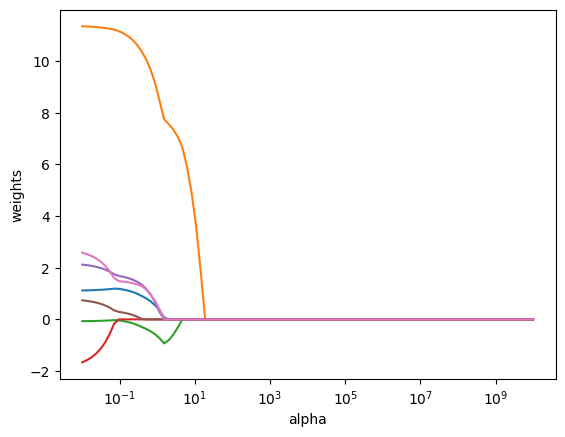

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso = Lasso(max_iter=10000)
coefs = [] 
for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(scale(x), y) 
    coefs.append(lasso.coef_) 
ax = plt.gca() 
ax.plot(alphas*2, coefs) 
ax.set_xscale('log')
plt.axis('tight') 
plt.xlabel('alpha') 
plt.ylabel('weights')

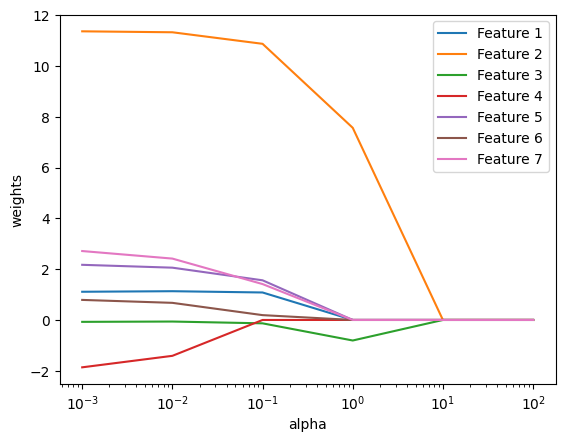

In [35]:
alphas = np.logspace(-3, 2, 6)  
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_scaled, y)
    coefs.append(lasso.coef_)
coefs = np.array(coefs)
ax = plt.gca()
for i in range(coefs.shape[1]):
    ax.plot(alphas, coefs[:, i], label=f"Feature {i+1}")

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend()
plt.show()

In [36]:
from sklearn.linear_model import Lasso, LassoCV

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso_cv = LassoCV(alphas=None, cv=10, max_iter=100000)
lasso_cv.fit(x_scaled, y)
best_alpha = lasso_cv.alpha_
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(x_scaled, y)
mse = mean_squared_error(y, lasso.predict(x_scaled))

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")

Best Alpha: 0.012729369386855026
Mean Squared Error: 5.082137488508964


In [38]:
pd.Series(lasso.coef_, index=x.columns)

PENGANGGURAN     1.138497
SUKU BUNGA      11.311951
NILAI TUKAR     -0.058547
GDP             -1.275194
KONSUMSI RT      2.024076
UANG BEREDAR     0.638501
KOMODITAS        2.326263
dtype: float64

### UJI HETEROKEDASITITAS

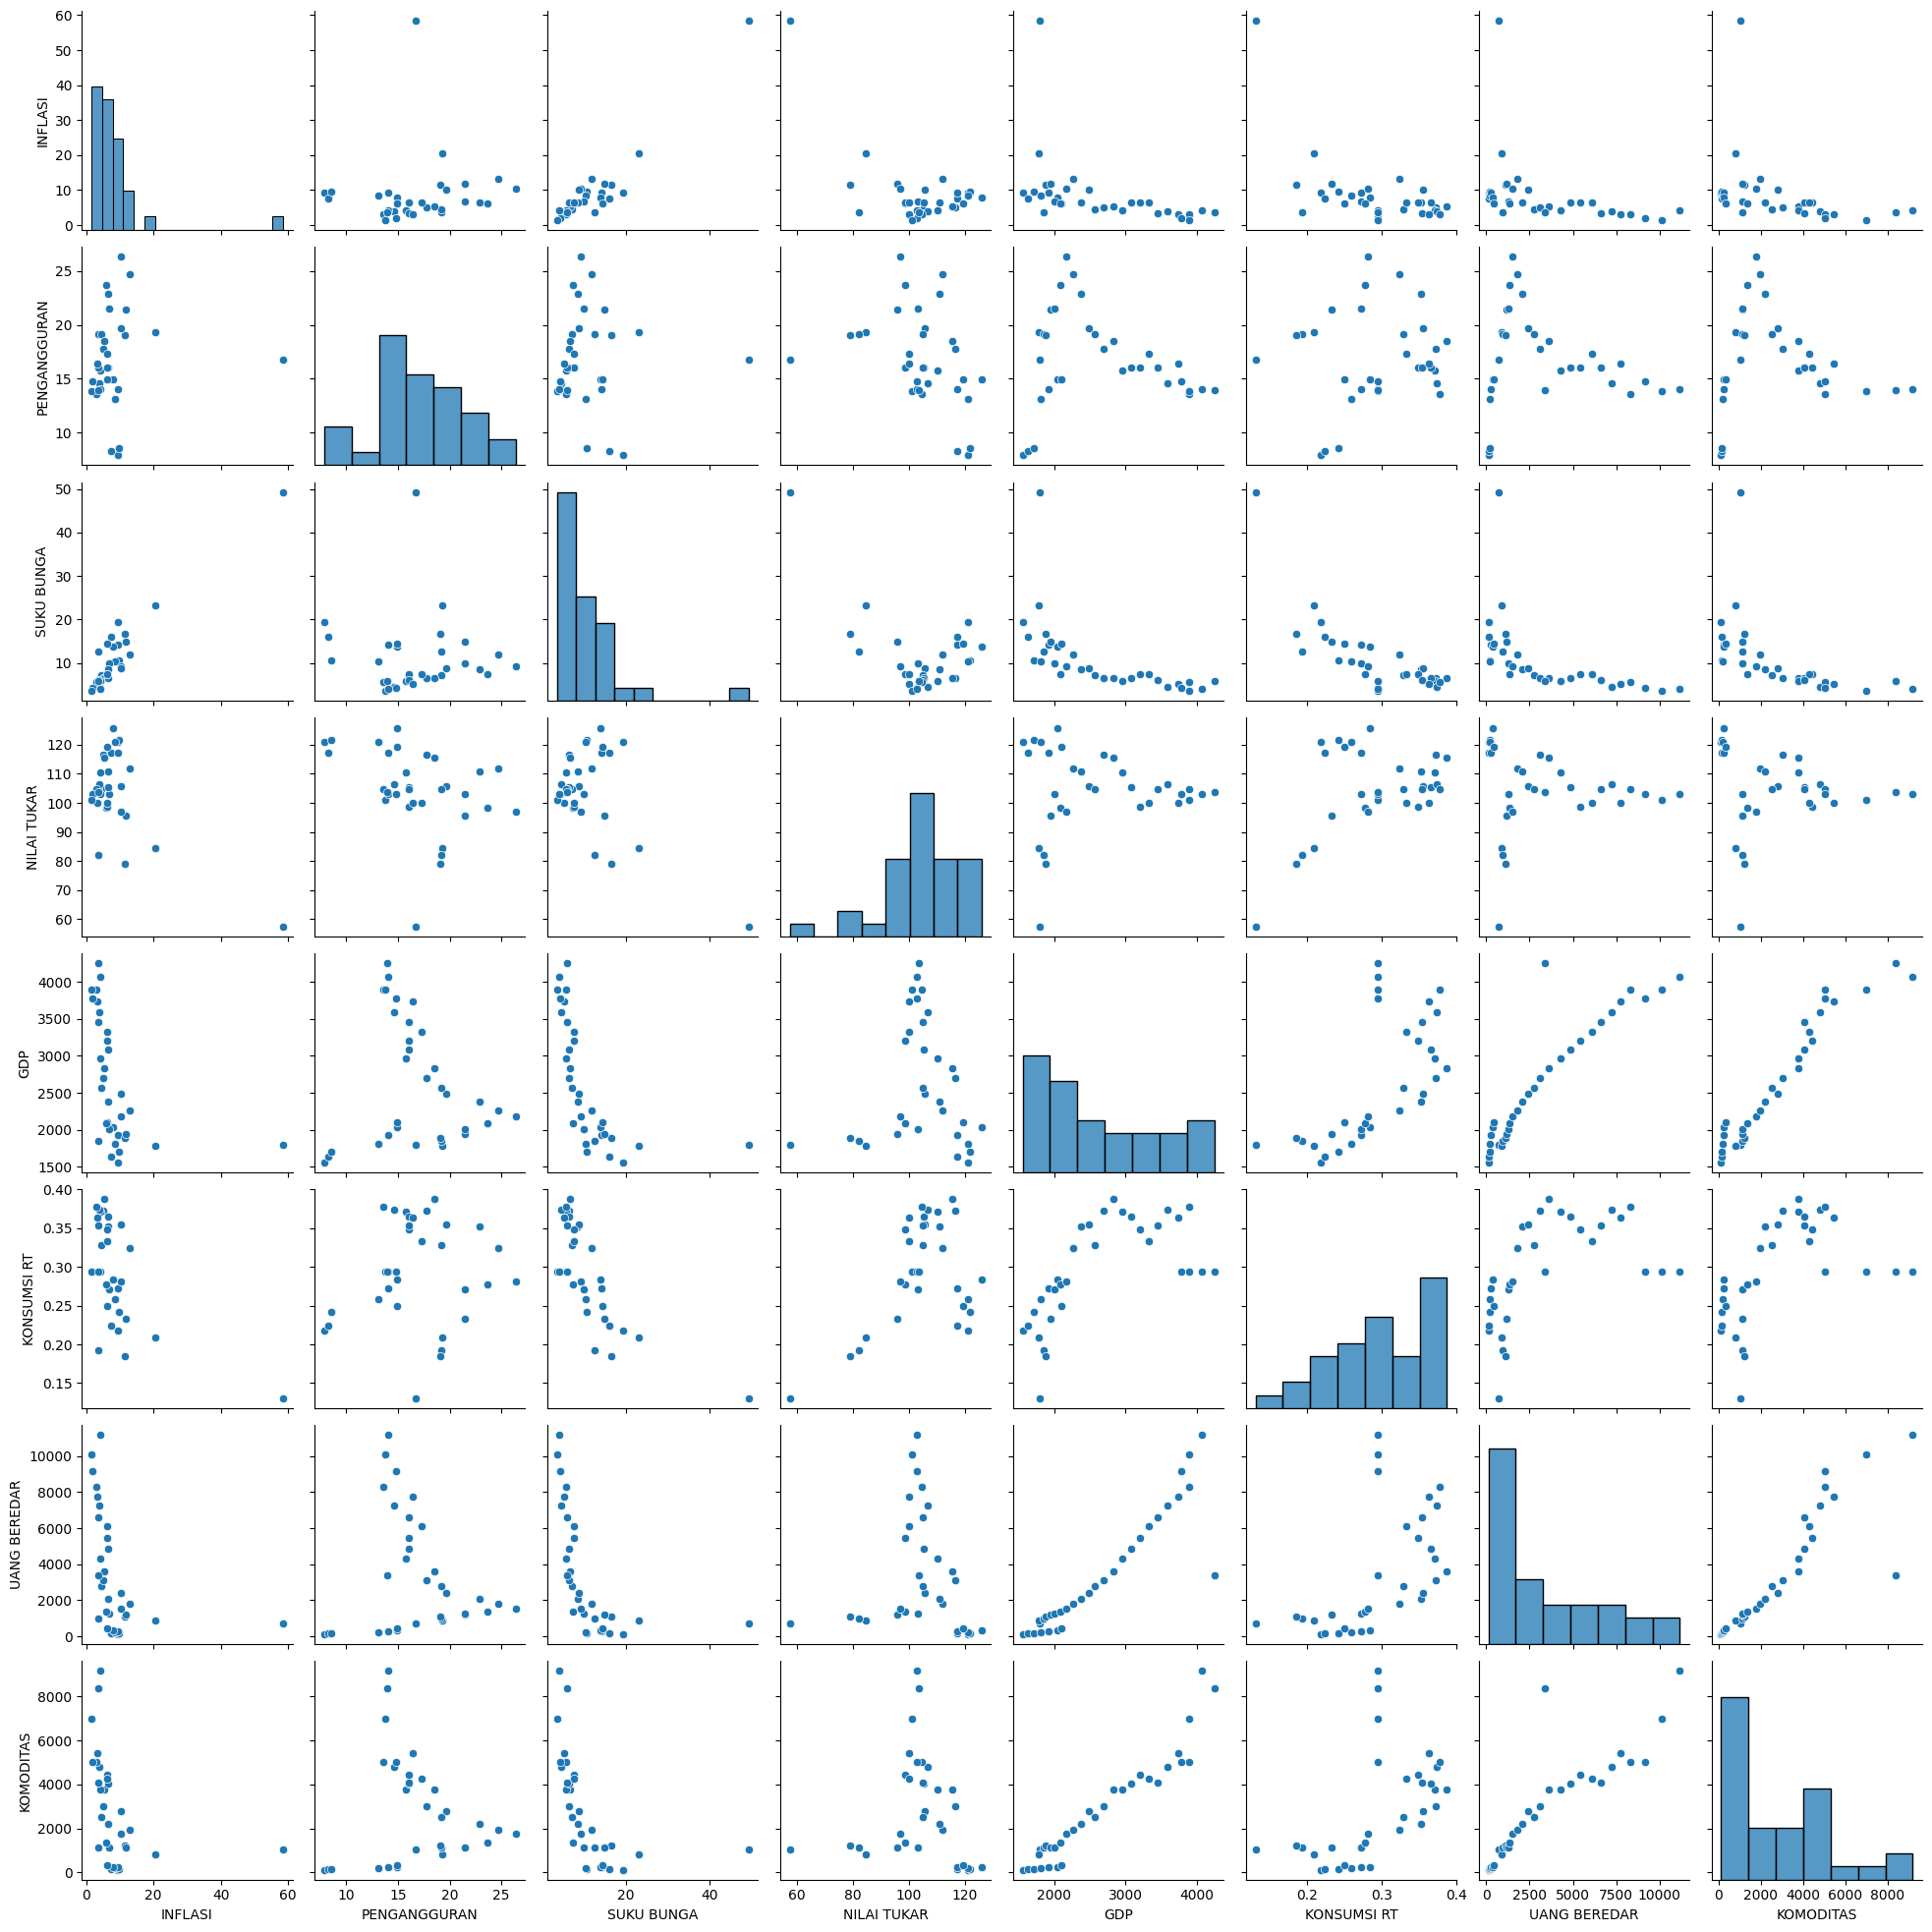

In [39]:
sns.pairplot(df);

In [40]:
# fig = sm.graphics.plot_regress_exog(modelPCA2, df)
# fig.tight_layout(pad=1.0)

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

In [42]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from itertools import zip_longest as lzip  

In [43]:
import statsmodels.api as smf 
from statsmodels.compat import lzip 
import statsmodels.stats.api as sms 
import statsmodels.api as sm 

In [44]:
bp_test = het_breuschpagan(modelPCA2.resid, modelPCA2.model.exog)
bp_labels = ['Statistik LM', 'P-Value LM', 'Statistik F', 'P-Value F']
lzip(bp_labels, bp_test)

[('Statistik LM', 14.152576114350987),
 ('P-Value LM', 0.027977473005401026),
 ('Statistik F', 3.253910465480171),
 ('P-Value F', 0.016039249172437278)]

In [45]:
white_test = het_white(modelPCA2.resid, modelPCA2.model.exog)
white_labels = ['Statistik LM', 'P-Value LM', 'Statistik F', 'P-Value F']
lzip(white_labels, white_test)

[('Statistik LM', 32.22313475801499),
 ('P-Value LM', 0.2239210517567931),
 ('Statistik F', 7.681186974156529),
 ('P-Value F', 0.0158536779046417)]

In [46]:
residuals = y - lasso.predict(x_scaled)
# residuals = modelPCA2.resid

In [47]:
exog = modelPCA2.model.exog

bp_test = het_breuschpagan(residuals, exog)
bp_labels = ['Statistik LM', 'P-Value LM', 'Statistik F', 'P-Value F']
lzip(bp_labels, bp_test)

[('Statistik LM', 14.429072361817118),
 ('P-Value LM', 0.025193682619126048),
 ('Statistik F', 3.366874366899361),
 ('P-Value F', 0.013672403145608717)]

### Transformasi Logaritma
Dapat mengurangi atau menghilangkan heteroskedastisitas jika hubungan antar variabel menjadi lebih linear setelah transformasi.

In [48]:
from statsmodels.api import GLM

In [49]:
df['log_inflasi'] = np.log(df['INFLASI'])
X = df[['PENGANGGURAN', 'SUKU BUNGA', 'NILAI TUKAR', 'KONSUMSI RT', 'UANG BEREDAR', 'KOMODITAS']]
y = df['log_inflasi']

model_transformed = sm.OLS(y, X).fit()
model_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            log_inflasi   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              221.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    1.18e-21
Time:                        21:24:44   Log-Likelihood:                         -4.7376
No. Observations:                  33   AIC:                                      21.48
Df Residuals:                      27   BIC:                                      30.45
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PENGANGGURAN     0.0282      0.013      2.247      0.033       0.002       0.054
SUKU BUNGA       0.0681      0.008      9.050      0.000       0.053       0.084
NILAI TUKAR      0.0032      0.003      0.914      0.369      -0.004       0.010
KONSUMSI RT      1.7771      1.535      1.158      0.257      -1.372       4.926
UANG BEREDAR -7.701e-05   3.79e-05     -2.034      0.052      -0.000    6.63e-07
KOMODITAS     2.038e-05   4.87e-05      0.419      0.679   -7.95e-05       0.000
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.490
Skew:                           0.097   Prob(JB):                        0.783
Kurtosis:                       2.435   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
weights = 1 / model_transformed.resid**2
wls_model = sm.WLS(y, X, weights=weights).fit()
print(wls_model.summary())

                                 WLS Regression Results                                
Dep. Variable:            log_inflasi   R-squared (uncentered):                   0.996
Model:                            WLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1218.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    1.54e-31
Time:                        21:24:44   Log-Likelihood:                          8.0661
No. Observations:                  33   AIC:                                     -4.132
Df Residuals:                      27   BIC:                                      4.847
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Robust Standard Errors:
Mengoreksi standar error tetapi tidak menghilangkan heteroskedastisitas

In [51]:
robust_model = model_transformed.get_robustcov_results(cov_type='HC0')
print(robust_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            log_inflasi   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              414.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    2.93e-25
Time:                        21:24:44   Log-Likelihood:                         -4.7376
No. Observations:                  33   AIC:                                      21.48
Df Residuals:                      27   BIC:                                      30.45
Df Model:                           6                                                  
Covariance Type:                  HC0                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [52]:
# model_robust = sm.OLS(df['INFLASI'], x).fit(cov_type='HC3')
# print(model_robust.summary())

In [53]:
# model_robust = sm.RLM(y, X).fit()
# model_robust.summary()

In [54]:
# model_robust = sm.RLM(y, X) 
# results_robust = model_robust.fit() 

# y_pred_robust = results_robust.predict(X)
# ssr_robust = ((y - y_pred_robust) ** 2).sum()
# tss = ((y - y.mean()) ** 2).sum()

# r_squared_robust = 1 - (ssr_robust / tss)
# print(f'R-squared (manual - robust model): {r_squared_robust}')

# r_squared_sklearn_robust = r2_score(y, y_pred_robust)
# print(f'R-squared (scikit-learn - robust model): {r_squared_sklearn_robust}')

In [55]:
# model = sm.OLS(y, X).fit()
# residuals = model.resid

# bp_test = het_breuschpagan(residuals, model.model.exog)
# bp_test_results = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], bp_test))

# print("Hasil Uji Breusch-Pagan:")
# print(bp_test_results)

In [56]:
# residuals_new = wls_model.resid 

# bp_test_new = het_breuschpagan(residuals_new, wls_model.model.exog)  # atau model_transformed.model.exog
# bp_test_results_new = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], bp_test_new))

# print("Hasil Uji Breusch-Pagan Setelah Perbaikan:")
# print(bp_test_results_new)

### WLS


In [57]:
# # Membuat model WLS (Weighted Least Squares)
# wls_model = sm.WLS(y, X_transformed, weights=1 / residuals_new**2).fit()
# wls_model.summary()

In [58]:
# Penanganan Residual

df['boxcox_KONSUMSI_RT'], _ = stats.boxcox(df['KONSUMSI RT'])
df['boxcox_KOMODITAS'], _ = stats.boxcox(df['KOMODITAS'])

# Model WLS setelah transformasi Box-Cox
X_boxcox = df[['PENGANGGURAN', 'SUKU BUNGA', 'boxcox_KONSUMSI_RT', 'boxcox_KOMODITAS']]
X_boxcox = sm.add_constant(X_boxcox)
wls_boxcox_model = sm.WLS(y, X_boxcox).fit()

print(wls_boxcox_model.summary())

                            WLS Regression Results                            
Dep. Variable:            log_inflasi   R-squared:                       0.808
Model:                            WLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     29.46
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.14e-09
Time:                        21:24:44   Log-Likelihood:                -6.4284
No. Observations:                  33   AIC:                             22.86
Df Residuals:                      28   BIC:                             30.34
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1553      1

In [59]:
# model_gls = sm.GLS(df['INFLASI'], x).fit()
# print(model_gls.summary())

In [60]:
# kolom = 'INFLASI'
# lambda_value = 0.30

# # Transformasi Box-Cox dengan λ = 0.30
# transformed_data = stats.boxcox(df[kolom], lmbda=lambda_value)
# df['transformed_' + kolom] = transformed_data
# print(df[['DATE', kolom, 'transformed_' + kolom]])

# plt.figure(figsize=(12,6))
# plt.subplot(1, 2, 1)
# plt.hist(df[kolom], bins=10, color='blue', alpha=0.7)
# plt.title(f'{kolom} Sebelum Transformasi')
# plt.subplot(1, 2, 2)
# plt.hist(transformed_data, bins=10, color='green', alpha=0.7)
# plt.title(f'{kolom} Setelah Transformasi Box-Cox (λ=0.30)')
# plt.show()

In [61]:
bp_test = het_breuschpagan(modelPCA2.resid, modelPCA2.model.exog)
bp_labels = ['Statistik LM', 'P-Value LM', 'Statistik F', 'P-Value F']
lzip(bp_labels, bp_test)

[('Statistik LM', 14.152576114350987),
 ('P-Value LM', 0.027977473005401026),
 ('Statistik F', 3.253910465480171),
 ('P-Value F', 0.016039249172437278)]

### LAMA

In [62]:
from sklearn.metrics import r2_score

In [63]:
# model_robust = sm.RLM(y, X).fit()

# # Menampilkan koefisien dan standar error
# print("Coefficients:\n", model_robust.params)
# print("\nStandard Errors:\n", model_robust.bse)

# # Mendapatkan nilai lain secara manual
# print("\nResiduals:\n", model_robust.resid)
# print("\nScale:\n", model_robust.scale)

In [64]:
# # Mendapatkan residual
# residuals = model_robust.resid
# fitted = model_robust.fittedvalues

# # Plot residual vs fitted values
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=fitted, y=residuals)
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Residual vs Fitted Values')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.show()

# # Histogram untuk normalitas residual
# plt.figure(figsize=(12, 6))
# sns.histplot(residuals, bins=10, kde=True)
# plt.title('Histogram of Residuals')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.show()

In [65]:
# predictions = model_robust.predict(X)
# print(predictions)

In [66]:
# Menghapus variabel tidak signifikan dan membangun model ulang
X_new = df[['PENGANGGURAN', 'SUKU BUNGA', 'KONSUMSI RT', 'KOMODITAS']]
X_new = sm.add_constant(X_new)

model_robust_new = sm.RLM(y, X_new).fit()
print(model_robust_new.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            log_inflasi   No. Observations:                   33
Model:                            RLM   Df Residuals:                       28
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 23 Sep 2024                                         
Time:                        21:24:44                                         
No. Iterations:                    50                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4634      0.548      0.845   

In [67]:
# Transformasi log pada variabel KONSUMSI RT dan KOMODITAS
df['log_KONSUMSI_RT'] = np.log(df['KONSUMSI RT'])
df['log_KOMODITAS'] = np.log(df['KOMODITAS'])

X_transformed = df[['PENGANGGURAN', 'SUKU BUNGA', 'log_KONSUMSI_RT', 'log_KOMODITAS']]
X_transformed = sm.add_constant(X_transformed)

model_transformed = sm.RLM(y, X_transformed).fit()
print(model_transformed.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            log_inflasi   No. Observations:                   33
Model:                            RLM   Df Residuals:                       28
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 23 Sep 2024                                         
Time:                        21:24:44                                         
No. Iterations:                    22                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6452      0.728     

In [68]:
residuals_new = model_robust_new.resid
exog_new = model_robust_new.model.exog

# Uji Breusch-Pagan
bp_test_new = het_breuschpagan(residuals_new, exog_new)
bp_test_results_new = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], bp_test_new))

print("Hasil Uji Breusch-Pagan setelah perbaikan:")
print(bp_test_results_new)

Hasil Uji Breusch-Pagan setelah perbaikan:
{'Lagrange multiplier statistic': 11.678905634373, 'p-value': 0.019905781013684183, 'f-value': 3.8343406787040344, 'f p-value': 0.013152148080590068}


### UJI RESIDUAL

In [69]:
from scipy.stats import boxcox

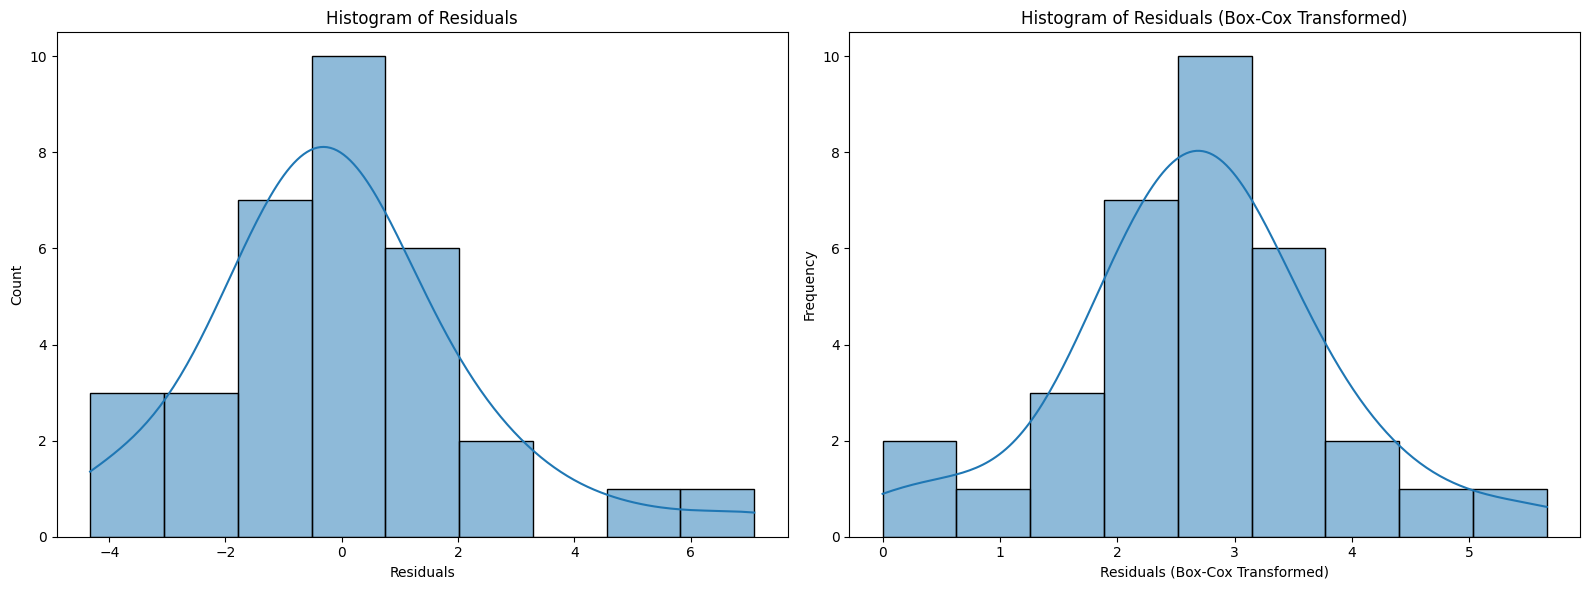

In [70]:
residuals_boxcox, _ = boxcox(residuals + np.abs(np.min(residuals)) + 1)  
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
sns.histplot(residuals_boxcox, kde=True)
plt.title('Histogram of Residuals (Box-Cox Transformed)')
plt.xlabel('Residuals (Box-Cox Transformed)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

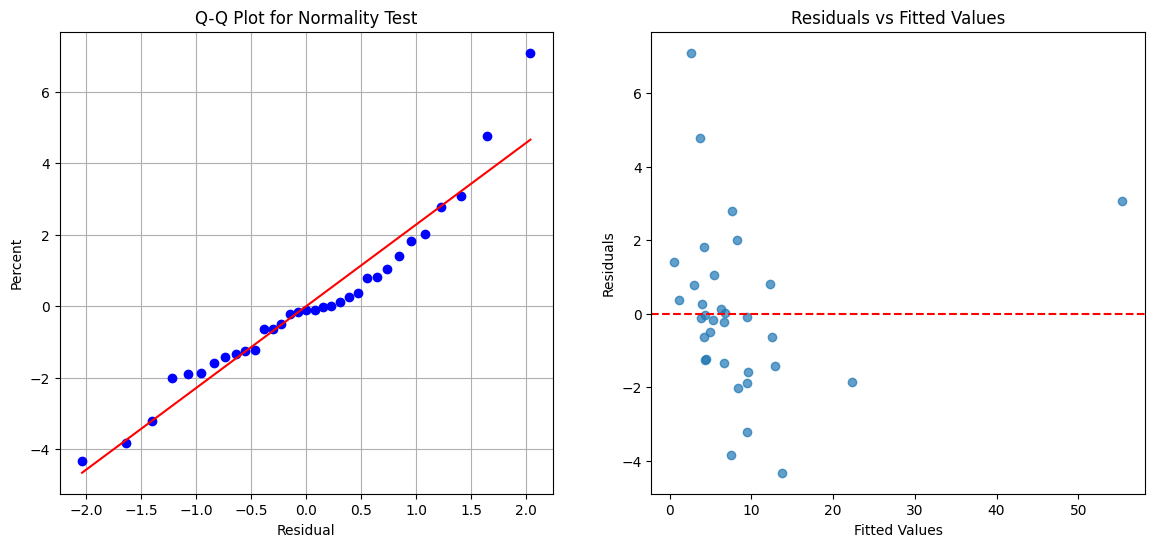

In [71]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(lasso.predict(x_scaled), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Test")
plt.xlabel("Residual")
plt.ylabel("Percent")
plt.grid(True)
plt.show()

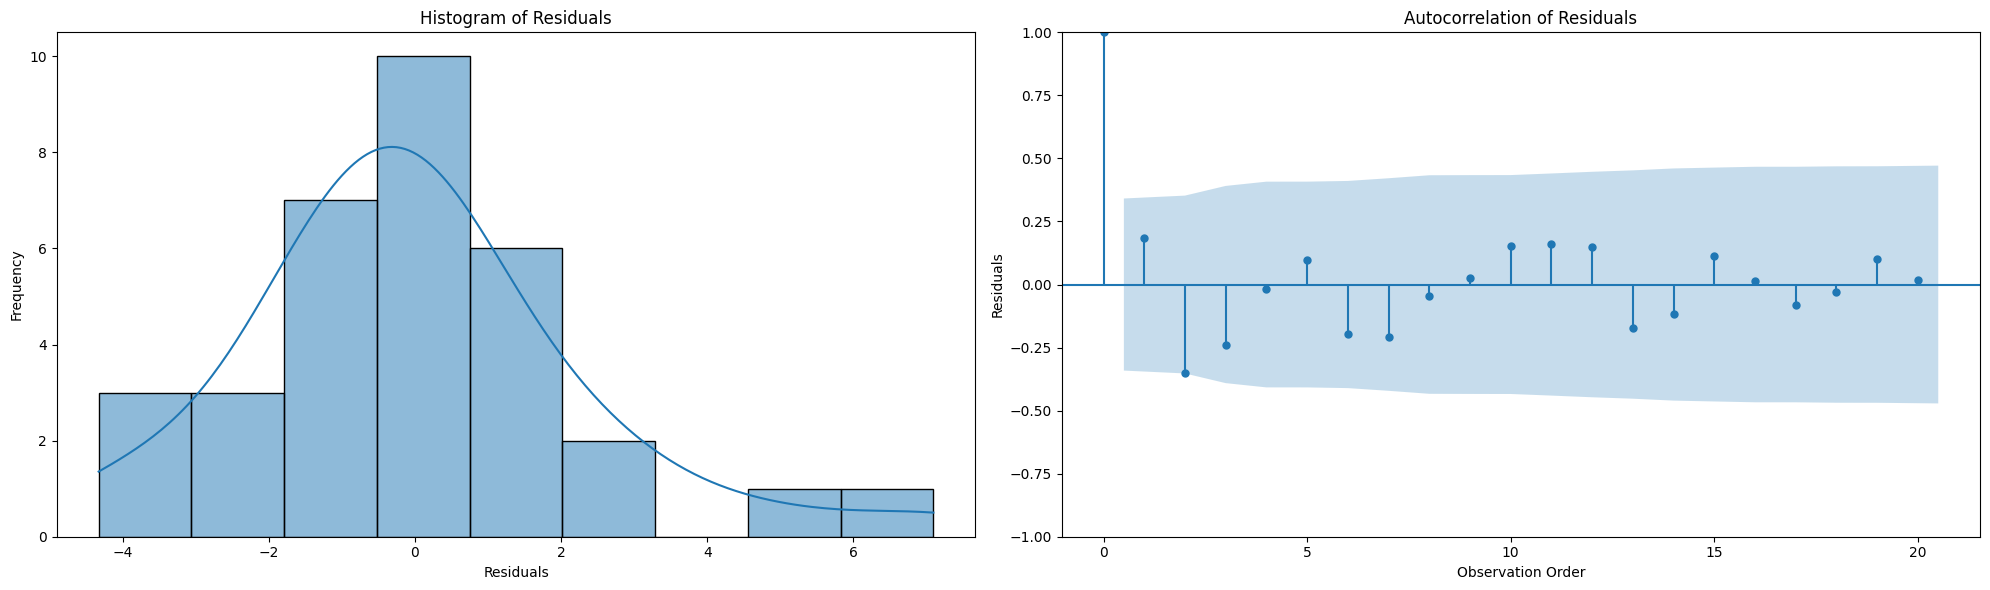

In [72]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation of Residuals')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

#### Normalitas residual

In [73]:
dw = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw}')

Durbin-Watson Statistic: 1.519279602959391


In [74]:
ks_statistic, ks_p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov Statistic: {ks_statistic}')
print(f'Kolmogorov-Smirnov p-value: {ks_p_value}')

Kolmogorov-Smirnov Statistic: 0.1324388334656459
Kolmogorov-Smirnov p-value: 0.5639967901333351


In [75]:
# Shapiro-Wilk Test
shapiro_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Statistic: {shapiro_statistic}')
print(f'Shapiro-Wilk p-value: {shapiro_p_value}')

Shapiro-Wilk Statistic: 0.9417418837547302
Shapiro-Wilk p-value: 0.07634615153074265


### UJI AUTO KORELASI

In [76]:
# x = sm.add_constant(x)
# fit = smf.OLS (y,x).fit() 
# fit.summary()

Lagrange Multiplier Statistic: Nilai ini sebesar 14.78. Ini menunjukkan adanya kemungkinan heteroskedastisitas dalam model regresi Anda. Semakin tinggi nilai ini, semakin kuat bukti untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas.

p-value: Nilai p sebesar 0.0388. Ini adalah nilai penting untuk keputusan statistik. Jika kita menggunakan tingkat signifikansi (alpha) 0.05, p-value ini lebih kecil dari alpha, sehingga kita menolak hipotesis nol. Ini menunjukkan bahwa ada bukti signifikan untuk menyatakan bahwa varians residual tidak konstan (heteroskedastisitas ada).

f-value: Nilai f sebesar 2.90. Ini adalah statistik uji yang digunakan untuk mengevaluasi signifikansi dari model regresi secara keseluruhan. Meskipun nilainya tidak langsung dibandingkan dengan p-value, nilai ini memberi indikasi bahwa ada variasi yang signifikan yang dapat dijelaskan oleh model.

f p-value: Nilai p untuk statistik f sebesar 0.0231. Sama seperti p-value sebelumnya, ini juga menunjukkan hasil yang signifikan karena nilai ini lebih kecil dari 0.05, yang mendukung adanya heteroskedastisitas.

In [77]:
X = df[['transformed_INFLASI', 'PENGANGGURAN', 'SUKU BUNGA', 'NILAI TUKAR', 'KONSUMSI RT', 'UANG BEREDAR', 'KOMODITAS']]
y = df['GDP']
model = sm.OLS(y, X)
fit = model.fit()

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)

KeyError: "['transformed_INFLASI'] not in index"

In [ ]:
y = df['INFLASI']
X = sm.add_constant(df[['transformed_INFLASI', 'PENGANGGURAN', 'SUKU BUNGA', 'NILAI TUKAR', 'KONSUMSI RT', 'UANG BEREDAR', 'KOMODITAS']])
model = sm.OLS(y, X)
fit = model.fit()

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)

In [ ]:
# from statsmodels.stats.diagnostic import het_breuschpagan

# residuals = model.resid
# f_stat, p_value, _, _ = het_breuschpagan(residuals, x)
# print(f"Breusch-Pagan p-value: {p_value}")